# Exploring data

# Assignment (Milestone 1)

In this assignment, we want to read in the `online_retail.csv` dataset and run some EDA on the data. This dataset was derived from the Online Retail II dataset contributed by Daqing Chen to the [UCI Machine Learning Repository](https://doi.org/10.24432/C5CG6D) in 2019.

Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [1]:
import pandas as pd
import numpy as np # added for assignment

churn = pd.read_csv("../data/online_retail.csv")
churn.head()

,invoice_id,invoice_date,customer_id,domestic_sale,item_types_purchased,total_quantity,total_price
0,489434,12/1/09 7:45,13085.0,True,8,166,505.30
1,489435,12/1/09 7:46,13085.0,True,4,60,145.80
2,489436,12/1/09 9:06,13078.0,True,19,193,630.33
3,489437,12/1/09 9:08,15362.0,True,23,145,310.75
4,489438,12/1/09 9:24,18102.0,True,17,826,2286.24


Here are some examples of questions we can be asking:

1. How many rows and columns are in the dataframe?  What are the columns, their types and their distribution (when it makes sense)?  <span style="color:red" float:right>[1 point]</span>

In [2]:
# look at how many rows and columns in the dataframe
print(churn.shape)

# Column names
print(list(churn.columns))

# Columns types
print(churn.dtypes)

(54716, 7)
['invoice_id', 'invoice_date', 'customer_id', 'domestic_sale', 'item_types_purchased', 'total_quantity', 'total_price']
invoice_id               object
invoice_date             object
customer_id             float64
domestic_sale              bool
item_types_purchased      int64
total_quantity            int64
total_price             float64
dtype: object


There are 54,716 rows and 7 columns. The columns are **invoice_id**, **invoice_date**, **customer_id**, **domestic_sale**, **item_types_purchased**, **total_quantity**, and **total_price**. 
The item_types_purchased and total_quantity are integers. The invoice_id and invoice_date are object. The domestic_sale is a boolean, and the total_price is a float.

In [3]:
churn.head()

,invoice_id,invoice_date,customer_id,domestic_sale,item_types_purchased,total_quantity,total_price
0,489434,12/1/09 7:45,13085.0,True,8,166,505.30
1,489435,12/1/09 7:46,13085.0,True,4,60,145.80
2,489436,12/1/09 9:06,13078.0,True,19,193,630.33
3,489437,12/1/09 9:08,15362.0,True,23,145,310.75
4,489438,12/1/09 9:24,18102.0,True,17,826,2286.24


In [4]:
# look at some distributions
# you need to run the following line to produce visualizations in a jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


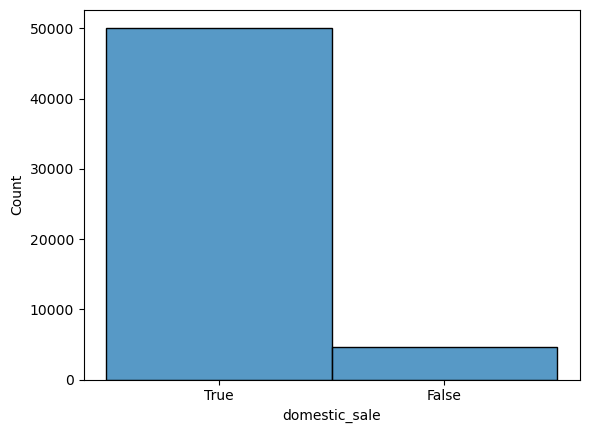

In [5]:
# domestic sale
sns.histplot(churn['domestic_sale'].map({True:'True', False:'False'}));

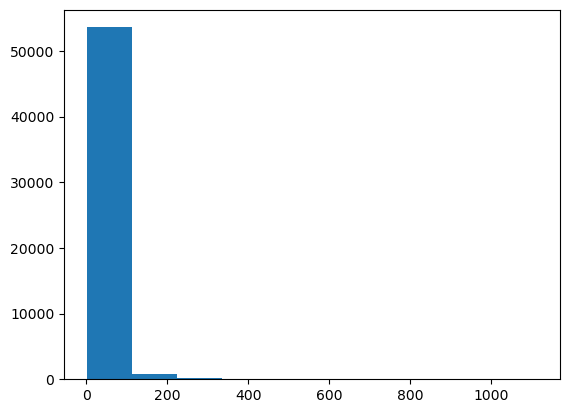

In [6]:
# let's try looking at the item types purchased 
plt.hist(churn['item_types_purchased']);

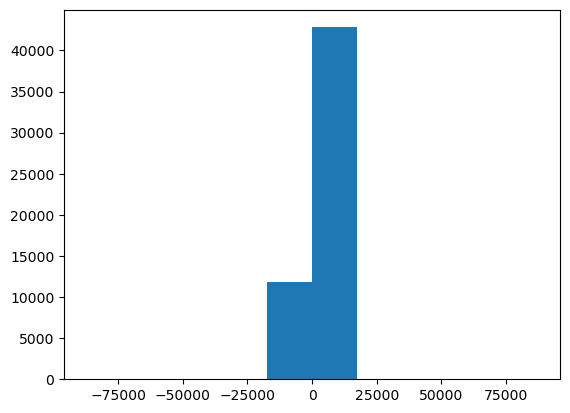

In [7]:
# Total Quantiy
plt.hist(churn['total_quantity']);

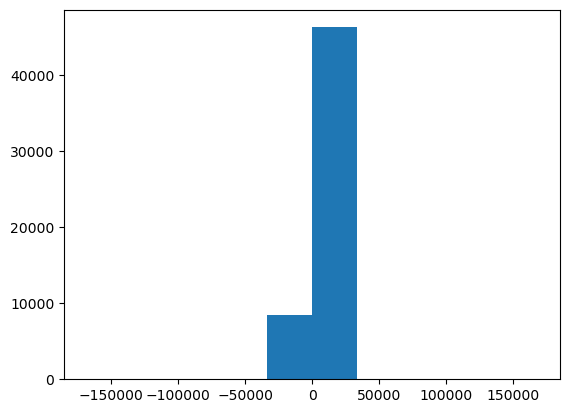

In [8]:
# Total Price
plt.hist(churn['total_price']);

2. Column Type Analysis
- `invoice_id` looks like an integer from .head(), but has type object. Why? <span style="color:red" float:right>[1 point]</span>
- `customer_id` seems like it should be an integer, but is a float. Why? <span style="color:red" float:right>[1 point]</span>
- `invoice_date` is an object, but should be a datetime. Make the conversion, sort the data by ascending date and then by invoice_id (for identical date times), and reset the index. <span style="color:red" float:right>[1 point]</span>

In [9]:
print(churn['invoice_id'].head())
print(churn['customer_id'].head())
print(churn['invoice_date'].head())


0    489434
1    489435
2    489436
3    489437
4    489438
Name: invoice_id, dtype: object
0    13085.0
1    13085.0
2    13078.0
3    15362.0
4    18102.0
Name: customer_id, dtype: float64
0    12/1/09 7:45
1    12/1/09 7:46
2    12/1/09 9:06
3    12/1/09 9:08
4    12/1/09 9:24
Name: invoice_date, dtype: object


1. invoice_id looks like an integer but has type object because there might be missing data or data represnted by a string like "?" in some rows, and invoice_id is an identifier and should not be treated as numeric, it means invoice_id is stored as a text.
2. customer_id seems like it should be an integer but it is a float beacuse it is stored with decimal points, we can see some customer_id like 13085.0 Also, if the type is int64, it means it cannaot contain NaN (missing value but catgorized as Not a Number), however the type float64 indicates that it can have NaN.

In [10]:
# convert invoice_date to datetime
churn['invoice_date'] = pd.to_datetime(churn['invoice_date'])

# sort the data by ascending date and then by invoice_id
churn.sort_values(by=['invoice_date', 'invoice_id'], ascending=[True, True], inplace = True)

# check
churn.head(20)

/tmp/ipykernel_850/732708238.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  churn['invoice_date'] = pd.to_datetime(churn['invoice_date'])


,invoice_id,invoice_date,customer_id,domestic_sale,item_types_purchased,total_quantity,total_price
0,489434,2009-12-01 07:45:00,13085.0,True,8,166,505.30
1,489435,2009-12-01 07:46:00,13085.0,True,4,60,145.80
2,489436,2009-12-01 09:06:00,13078.0,True,19,193,630.33
3,489437,2009-12-01 09:08:00,15362.0,True,23,145,310.75
4,489438,2009-12-01 09:24:00,18102.0,True,17,826,2286.24
5,489439,2009-12-01 09:28:00,12682.0,False,19,219,426.30
6,489440,2009-12-01 09:43:00,18087.0,True,2,16,50.40
7,489441,2009-12-01 09:44:00,18087.0,True,4,102,344.34
8,489442,2009-12-01 09:46:00,13635.0,True,23,275,382.37
9,489443,2009-12-01 09:50:00,14110.0,True,7,120,285.06


In [11]:
# Reset the index
churn.reset_index(drop=True, inplace=True)

# check
churn.head(20)


,invoice_id,invoice_date,customer_id,domestic_sale,item_types_purchased,total_quantity,total_price
0,489434,2009-12-01 07:45:00,13085.0,True,8,166,505.30
1,489435,2009-12-01 07:46:00,13085.0,True,4,60,145.80
2,489436,2009-12-01 09:06:00,13078.0,True,19,193,630.33
3,489437,2009-12-01 09:08:00,15362.0,True,23,145,310.75
4,489438,2009-12-01 09:24:00,18102.0,True,17,826,2286.24
5,489439,2009-12-01 09:28:00,12682.0,False,19,219,426.30
6,489440,2009-12-01 09:43:00,18087.0,True,2,16,50.40
7,489441,2009-12-01 09:44:00,18087.0,True,4,102,344.34
8,489442,2009-12-01 09:46:00,13635.0,True,23,275,382.37
9,489443,2009-12-01 09:50:00,14110.0,True,7,120,285.06


3. Do any columns appear to have unique rows? How do we show that? If any rows have almost unique values, explore the data to determine why. Take any appropriate action to clean the data based on this insight. <span style="color:red" float:right>[1 point]</span>

In [12]:
# check info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54716 entries, 0 to 54715
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   invoice_id            54716 non-null  object        
 1   invoice_date          54716 non-null  datetime64[ns]
 2   customer_id           45777 non-null  float64       
 3   domestic_sale         54716 non-null  bool          
 4   item_types_purchased  54716 non-null  int64         
 5   total_quantity        54716 non-null  int64         
 6   total_price           54716 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.6+ MB


In [13]:
# check unique values for each column
churn['invoice_id'].value_counts()

invoice_id
537017     2
536764     2
536762     2
536761     2
C536760    2
          ..
519408     1
519409     1
519410     1
519411     1
581587     1
Name: count, Length: 53628, dtype: int64

In [14]:
churn['invoice_date'].value_counts()

invoice_date
2010-12-09 15:56:00    10
2010-12-09 15:57:00    10
2010-12-09 13:34:00     8
2010-12-01 14:34:00     8
2010-12-09 15:58:00     8
                       ..
2010-08-31 11:55:00     1
2010-08-31 11:58:00     1
2010-08-31 12:05:00     1
2010-08-31 12:06:00     1
2011-12-09 12:50:00     1
Name: count, Length: 47566, dtype: int64

In [15]:
churn['customer_id'].value_counts()
(churn['customer_id'].isnull()).value_counts()

customer_id
False    45777
True      8939
Name: count, dtype: int64

In [16]:
churn['domestic_sale'].value_counts()

domestic_sale
True     50127
False     4589
Name: count, dtype: int64

In [17]:
churn['item_types_purchased'].value_counts()

item_types_purchased
1      13846
2       3426
3       2250
4       1711
5       1562
       ...  
501        1
582        1
534        1
620        1
731        1
Name: count, Length: 429, dtype: int64

In [18]:
churn['total_quantity'].value_counts()

total_quantity
-1       2585
 1       1373
-2       1350
-3        831
-4        686
         ... 
 4347       1
 2172       1
 3040       1
 949        1
 2011       1
Name: count, Length: 2408, dtype: int64

In [19]:
churn['total_price'].value_counts()

total_price
 0.00       5372
-12.75       159
-4.95        134
-9.95        126
 15.00       125
            ... 
 364.51        1
 113.54        1
 3485.31       1
 1259.48       1
 140.64        1
Name: count, Length: 30846, dtype: int64

By checking the data's info, there are 54,716 entries. 
1. **invoice_id** should all have unqiue rows but there are some invoice_id that appears 2 times, that may indicate duplicate data. 
1. **invoice_date** uses datetime and includes timestamp and therefore created many unique rows, depending on what data we want to see, we may want to clean up and drop the timestamp to aggregate to fewer unique rows or filter by month or by year depending on what we want to analyze.
1. **customer_id** has 5942 unique values, there were 8939 missing values, we may want to drop the missing values but the rest of the columns maybe data we may want. We can determine what entries to drop if too many columns in that entry have missing values.
1. **domestic_sale** is a boolean and no missing value, I don't think a clean up is necessary.
1. **item_types_purchased** has 429 unique values, we can group range values into bins in plots.
1. **total_quantity** and **total_price** are similar to item_types_purchased, can be groups by range values



4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - Are there missing values in the data? If the goal of this analysis is to eventually predict customer churn, how should rows with missing data be handled? <span style="color:red" float:right>[1 point]</span>  

Yes I have observed some negative values on quantity and price, I figure that could mean return/refund transactions instead of incorrect data collection. 

In [20]:
(churn['invoice_id'].isnull()).value_counts()

invoice_id
False    54716
Name: count, dtype: int64

In [21]:
(churn['invoice_date'].isnull()).value_counts()

invoice_date
False    54716
Name: count, dtype: int64

In [22]:
(churn['customer_id'].isnull()).value_counts()

customer_id
False    45777
True      8939
Name: count, dtype: int64

In [23]:
(churn['domestic_sale'].isnull()).value_counts()

domestic_sale
False    54716
Name: count, dtype: int64

In [24]:
(churn['item_types_purchased'].isnull()).value_counts()

item_types_purchased
False    54716
Name: count, dtype: int64

In [25]:
(churn['total_quantity'].isnull()).value_counts()

total_quantity
False    54716
Name: count, dtype: int64

In [26]:
(churn['total_price'].isnull()).value_counts()

total_price
False    54716
Name: count, dtype: int64

I found some missing data in customer id, but did not find missing values in other columns. We can use a couple different approach, we can either drop the rows with missing customer_id or impute some dummy values for missing customer_id. Dropping the rows of data may somewhat skew the data beacuse 8939 rows out of 54716 rows have missing data. Imputing dummy values on the customer_id column will allow us to work with the full set of sale data. 

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least one question and answer it using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - How do quantity sold and total sales tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
   - How long do customers typically go between purchases? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intentionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

Let's choose "How many transactions on average do users have in a given week?"  
**Step 1**, we want to convert the date column to datetime format so we can use pandas to extract week information 

In [27]:
# convert date column to datetime format
churn['invoice_date'] = pd.to_datetime(churn['invoice_date'], format='%m/%d/%y %H:%M')

# Extrat week information and make sure each week is not mixed with another year's week
churn['week'] = churn['invoice_date'].dt.strftime('%Y-%U')  # year-week number


**Step 2**, we want to count the weekly aggregated transactions per user 

In [28]:
# count weekly transactions per user
# group the dataframe by customer id column and the week column we created,
# then aggregate the invoice id (which represents the number of transactions),
# use nunique() to make sure we are counting only unique invoices (since we found out there are some duplicate invoice ids),
# reset_index converts the grouping into a regular Dataframe instead of multi-index
weekly_trans = churn.groupby(['customer_id', 'week'])['invoice_id'].nunique().reset_index(name='transactions')

# check
weekly_trans

,customer_id,week,transactions
0,12346.0,2009-50,5
1,12346.0,2010-01,2
2,12346.0,2010-02,1
3,12346.0,2010-03,1
4,12346.0,2010-04,1
...,...,...,...
35246,18287.0,2010-38,2
35247,18287.0,2010-47,1
35248,18287.0,2011-21,1
35249,18287.0,2011-41,1


**Step 3**, Compute the average number of transactions per week per user

In [29]:
# compute the average weekly transaction per user
avg_trans_pwk = weekly_trans['transactions'].mean()
# we don't want to round the variable, but we can print it to only show only 2 decimal places
print(f'Average weekly transactions per user is {avg_trans_pwk:.2f}')

Average weekly transactions per user is 1.27


**Step 4**, make a plot to visualize the results

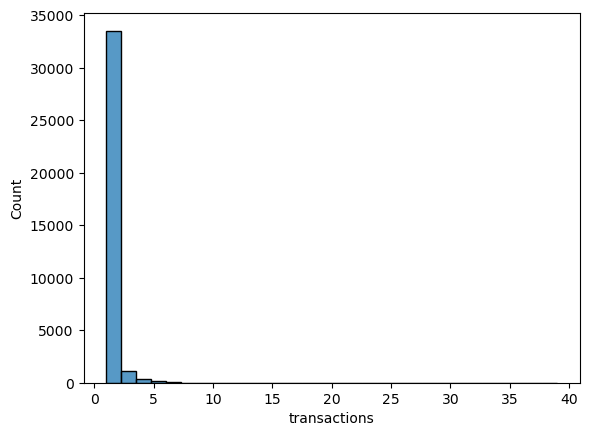

In [30]:
sns.histplot(weekly_trans['transactions'], bins = 30);

**Step 5** Perhaps we want to focus the distribution a little more on transactions that are less than 10 in a week. Let's try with a filter.

In [31]:
# filter to show data of weekly transactions less than 10 and give this new df a new name
weekly_trans_filtered = weekly_trans[weekly_trans['transactions']<10]

# compute the average weekly transaction per user
avg_trans_pwk_filtered = weekly_trans_filtered['transactions'].mean()

# print result
print(f'Average weekly transactions per user is {avg_trans_pwk_filtered:.2f}')

Average weekly transactions per user is 1.26


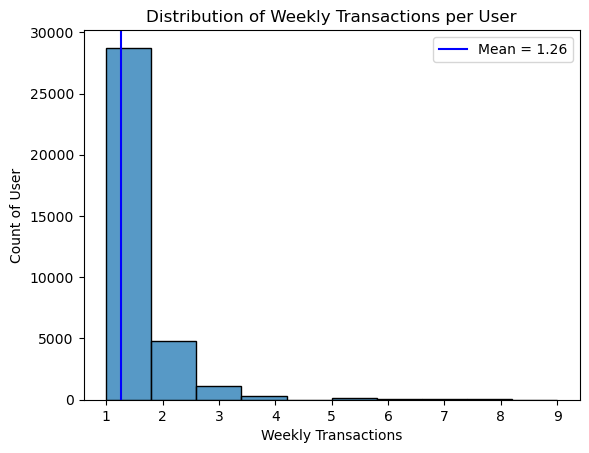

In [32]:
# Visualize with average shown
sns.histplot(weekly_trans_filtered['transactions'], bins = 10)
plt.axvline(avg_trans_pwk_filtered, color = 'blue', label = f'Mean = {avg_trans_pwk_filtered:.2f}')
plt.xlabel('Weekly Transactions')
plt.ylabel('Count of User')
plt.title('Distribution of Weekly Transactions per User')
plt.legend();

6. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

For data with timestamp column, we can extract Year, Quarter, Month, Day, Day of Week etc. We can look at if weekend is a factor for transactions or hour of the day (morning or afternoon) could be a factor. 

In [33]:
# codes to extract additional features
churn['year'] = churn['invoice_date'].dt.year
churn['month'] = churn['invoice_date'].dt.month
churn['day_of_week'] = churn['invoice_date'].dt.day_name()
churn['hour'] = churn['invoice_date'].dt.hour
churn['is_weekend'] = churn['invoice_date'].dt.dayofweek >= 5

# check
churn.head()

,invoice_id,invoice_date,customer_id,domestic_sale,item_types_purchased,total_quantity,total_price,week,year,month,day_of_week,hour,is_weekend
0,489434,2009-12-01 07:45:00,13085.0,True,8,166,505.30,2009-48,2009,12,Tuesday,7,False
1,489435,2009-12-01 07:46:00,13085.0,True,4,60,145.80,2009-48,2009,12,Tuesday,7,False
2,489436,2009-12-01 09:06:00,13078.0,True,19,193,630.33,2009-48,2009,12,Tuesday,9,False
3,489437,2009-12-01 09:08:00,15362.0,True,23,145,310.75,2009-48,2009,12,Tuesday,9,False
4,489438,2009-12-01 09:24:00,18102.0,True,17,826,2286.24,2009-48,2009,12,Tuesday,9,False


7. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

There could be relationship between number of transactions and day of week or month of year etc., or we could check if sales (transactions) been growing over time. 

In [34]:
# let's try to visualize relationship of transactions vs day of week

# make the day of week to show in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# convert to categorical using ordered = True
churn['day_of_week'] = pd.Categorical(churn['day_of_week'], categories = day_order, ordered = True)

# find the average number of transactions on a given day of week
day_of_wk_trans = churn.groupby(['day_of_week'])['invoice_id'].nunique().reset_index(name='transactions')

# show
day_of_wk_trans

/tmp/ipykernel_850/1682468209.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_wk_trans = churn.groupby(['day_of_week'])['invoice_id'].nunique().reset_index(name='transactions')


,day_of_week,transactions
0,Monday,8595
1,Tuesday,10299
2,Wednesday,9597
3,Thursday,11335
4,Friday,8505
5,Saturday,32
6,Sunday,5265


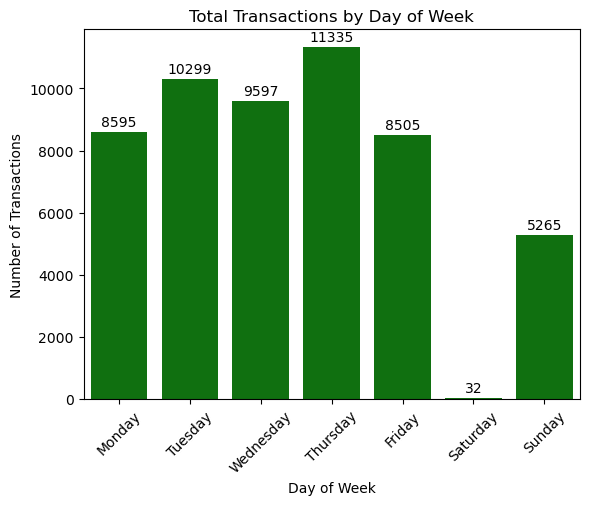

In [35]:
# visualize
sns.barplot(data = day_of_wk_trans, x ='day_of_week', y = 'transactions', color = 'green')
plt.title('Total Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45); # to show the day of week labels at an angle

# Add count labels on top of each bar
for index, row in day_of_wk_trans.iterrows():
    plt.text(
        x=index, 
        y=row['transactions'] + 100,     # position slightly above the bar
        s=str(row['transactions']), 
        ha='center',                     # horizontally centered
        va='bottom', 
        fontsize=10
    )


From the plot, we can see that there were more transactions on the week day versus Saturday and Sunday, the transcations on Saturday is bascially non-existent. We may want to investigate if the data really had a relationship to the day of week or if the data was biased. For example, if the business does not operate on Saturday and on Sundays it only operates half of the hours it would operate on a weekday, then maybe Sunday is in fact a busy day with a lot of transactions.   

In [36]:
# Check if sales grow over time (months)

# find the average number of transactions on each month and year
monthly_trans = churn.groupby(['year','month'])['invoice_id'].nunique().reset_index(name='transactions')

# check
monthly_trans

,year,month,transactions
0,2009,12,2330
1,2010,1,1633
2,2010,2,1969
3,2010,3,2367
4,2010,4,1892
5,2010,5,2418
6,2010,6,2216
7,2010,7,2017
8,2010,8,1877
9,2010,9,2375


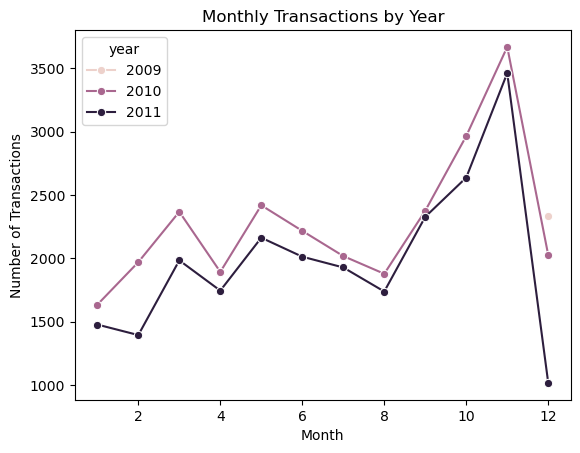

In [37]:
# visualize
sns.lineplot(data = monthly_trans, x = 'month', y = 'transactions', hue = 'year', marker = 'o') # draw a spearte line for each year
plt.title('Monthly Transactions by Year')
plt.xlabel('Month')
plt.ylabel('Number of Transactions');

The chart gives us some inights. It shows that the distribution of the sales over the year is similar in 2010 and 2011, with peak around November, and it also shows that the overall monthly sales in 2011 is lower than 2010. And there was only one data point for Dec 2009 and number of transactions has declinced in Dec 2010 and then again in Dec 2011.

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can use to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

# End of assignment